In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import hvplot.pandas
import holoviews as hv
pd.set_option('display.max_columns', 200)
warnings.filterwarnings("ignore")


In [2]:
airline_flights = pd.read_csv('Data/US Airline Flight Routes and Fares 1993-2024 2.csv')
flights_2018 = airline_flights[airline_flights['Year'] == 2018]
flights_2018.tail()



,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
212418,Table1a,2018,4,31834,31703,"Fayetteville, AR","New York City, NY (Metropolitan Area)",15919,11618,XNA,EWR,1159,107,357.24,UA,0.7102,371.74,AA,0.1786,320.94,NaN,NaN,201841591911618XNAEWR
212419,Table1a,2018,4,31834,31703,"Fayetteville, AR","New York City, NY (Metropolitan Area)",15919,12197,XNA,HPN,1159,3,359.38,AA,0.6333,351.95,AA,0.6333,351.95,NaN,NaN,201841591912197XNAHPN
212420,Table1a,2018,4,31834,31703,"Fayetteville, AR","New York City, NY (Metropolitan Area)",15919,12478,XNA,JFK,1159,8,290.22,AA,0.5128,318.76,DL,0.3846,277.47,NaN,NaN,201841591912478XNAJFK
212421,Table1a,2018,4,31834,31703,"Fayetteville, AR","New York City, NY (Metropolitan Area)",15919,12953,XNA,LGA,1159,224,288.82,AA,0.7102,285.67,AA,0.7102,285.67,NaN,NaN,201841591912953XNALGA
212422,Table1a,2018,4,31834,31703,"Fayetteville, AR","New York City, NY (Metropolitan Area)",15919,15070,XNA,SWF,1159,1,382.38,AA,0.7500,440.83,DL,0.2500,207.00,NaN,NaN,201841591915070XNASWF


In [3]:
fare_data_df = flights_2018[['fare_low', 'carrier_low', 'carrier_lg', 'fare_lg', 'city1', 'airport_1', 'airport_2',
       'city2', 'airportid_1', 'airportid_2', 'large_ms', 'fare', 'lf_ms', ]].copy()
fare_data_df.dropna()                                   
fare_data_df

,fare_low,carrier_low,carrier_lg,fare_lg,city1,airport_1,airport_2,city2,airportid_1,airportid_2,large_ms,fare,lf_ms
192323,246.96,AA,AA,246.96,"Albuquerque, NM",ABQ,HPN,"New York City, NY (Metropolitan Area)",10140,12197,0.6279,303.50,0.6279
192616,259.78,WN,UA,348.01,"Albuquerque, NM",ABQ,IAD,"Washington, DC (Metropolitan Area)",10140,12264,0.5205,319.73,0.1406
193319,115.21,F9,UA,259.19,"Albuquerque, NM",ABQ,IAH,"Houston, TX",10140,12266,0.9258,261.24,0.0114
193406,278.65,WN,WN,278.65,"Albuquerque, NM",ABQ,ISP,"New York City, NY (Metropolitan Area)",10140,12391,1.0000,278.65,1.0000
193470,196.35,B6,B6,196.35,"Albuquerque, NM",ABQ,JFK,"New York City, NY (Metropolitan Area)",10140,12478,0.7772,217.29,0.7772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212418,320.94,AA,UA,371.74,"Fayetteville, AR",XNA,EWR,"New York City, NY (Metropolitan Area)",15919,11618,0.7102,357.24,0.1786
212419,351.95,AA,AA,351.95,"Fayetteville, AR",XNA,HPN,"New York City, NY (Metropolitan Area)",15919,12197,0.6333,359.38,0.6333
212420,277.47,DL,AA,318.76,"Fayetteville, AR",XNA,JFK,"New York City, NY (Metropolitan Area)",15919,12478,0.5128,290.22,0.3846
212421,285.67,AA,AA,285.67,"Fayetteville, AR",XNA,LGA,"New York City, NY (Metropolitan Area)",15919,12953,0.7102,288.82,0.7102


In [4]:
#fare_data_df.columns

In [5]:
#dropping row if 'carrier_lg' == 'carrier_low'
 #because... data_spam ; just means they matched their own price
fare_data_df = fare_data_df[fare_data_df['carrier_low'] != fare_data_df['carrier_lg']]
fare_data_df


,fare_low,carrier_low,carrier_lg,fare_lg,city1,airport_1,airport_2,city2,airportid_1,airportid_2,large_ms,fare,lf_ms
192616,259.78,WN,UA,348.01,"Albuquerque, NM",ABQ,IAD,"Washington, DC (Metropolitan Area)",10140,12264,0.5205,319.73,0.1406
193319,115.21,F9,UA,259.19,"Albuquerque, NM",ABQ,IAH,"Houston, TX",10140,12266,0.9258,261.24,0.0114
193651,206.38,WN,AA,231.32,"Albuquerque, NM",ABQ,LGA,"New York City, NY (Metropolitan Area)",10140,12953,0.4349,233.80,0.2399
193717,147.35,WN,AA,235.89,"Albuquerque, NM",ABQ,LGB,"Los Angeles, CA (Metropolitan Area)",10140,12954,0.4842,189.29,0.4526
194661,141.14,AS,UA,189.17,"Albuquerque, NM",ABQ,SFO,"San Francisco, CA (Metropolitan Area)",10140,14771,0.5164,175.31,0.2856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212413,188.53,UA,DL,228.78,"Knoxville, TN",TYS,LGA,"New York City, NY (Metropolitan Area)",15412,12953,0.8834,230.07,0.0262
212417,280.42,AA,DL,306.88,"Knoxville, TN",TYS,TPA,"Tampa, FL (Metropolitan Area)",15412,15304,0.5191,294.63,0.4468
212418,320.94,AA,UA,371.74,"Fayetteville, AR",XNA,EWR,"New York City, NY (Metropolitan Area)",15919,11618,0.7102,357.24,0.1786
212420,277.47,DL,AA,318.76,"Fayetteville, AR",XNA,JFK,"New York City, NY (Metropolitan Area)",15919,12478,0.5128,290.22,0.3846


In [6]:
# calculate data set for low fare travel
min_low_fare = fare_data_df['fare_low'].min()
max_low_fare = fare_data_df['fare_low'].max()
mean_low_fare = fare_data_df['fare_low'].mean()
median_low_fare = fare_data_df['fare_low'].median()
std_low_fare = fare_data_df['fare_low'].std()
var_low_fare = fare_data_df['fare_low'].var()

In [7]:
# create data frame
low_fare_data = {'min_low_fare': [min_low_fare],
        'max_low_fare': [max_low_fare],
        'mean_low_fare': [mean_low_fare],
        'median_low_fare': [median_low_fare],
        'std_low_fare': [std_low_fare],
        'var_low_fare': [var_low_fare]}

low_fare_df = pd.DataFrame(low_fare_data)
low_fare_df

,min_low_fare,max_low_fare,mean_low_fare,median_low_fare,std_low_fare,var_low_fare
0,62.61,528.03,198.864176,203.31,70.191413,4926.834491


In [8]:
# calculate data set for high fare travel
min_high_fare = fare_data_df['fare_lg'].min()
max_high_fare = fare_data_df['fare_lg'].max()
mean_high_fare = fare_data_df['fare_lg'].mean()
median_high_fare = fare_data_df['fare_lg'].median()
std_high_fare = fare_data_df['fare_lg'].std()
var_high_fare = fare_data_df['fare_lg'].var()

In [9]:
# create data frame
high_fare_data = {'min_high_fare': [min_high_fare],
        'max_high_fare': [max_high_fare],
        'mean_high_fare': [mean_high_fare],
        'median_high_fare': [median_high_fare],
        'std_high_fare': [std_high_fare],
        'var_high_fare': [var_high_fare]}

high_fare_df = pd.DataFrame(high_fare_data)
high_fare_df

,min_high_fare,max_high_fare,mean_high_fare,median_high_fare,std_high_fare,var_high_fare
0,82.85,773.0,262.477412,257.465,71.987598,5182.214325


The lower quartile of low air fare is: 140.6775
The upper quartile of low air fare is: 250.4975
The interquartile range of low air fare is: 109.82
The the median of low air fare is: 203.31 
Values below -24.05249999999998 could be outliers.
Values above 415.22749999999996 could be outliers.


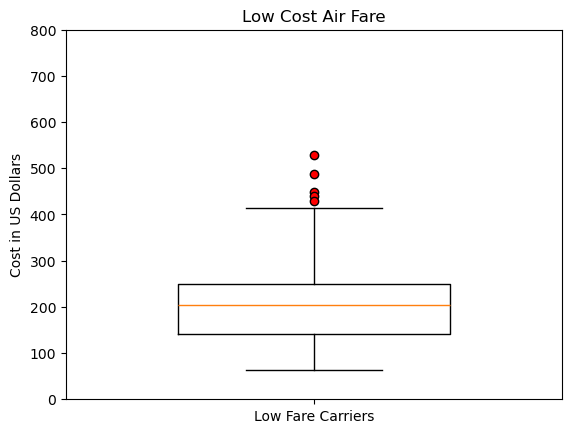

In [10]:
budget_air = fare_data_df['fare_low']
budget_air = fare_data_df['fare_low'].dropna()

quartiles = budget_air.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of low air fare is: {lowerq}")
print(f"The upper quartile of low air fare is: {upperq}")
print(f"The interquartile range of low air fare is: {iqr}")
print(f"The the median of low air fare is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.set_title('Low Cost Air Fare')
ax1.set_ylabel('Cost in US Dollars')
ax1.boxplot([budget_air], vert=True, widths=0.55,
           flierprops=dict(markerfacecolor='r', marker='o'))
ax1.set_xticklabels(['Low Fare Carriers'])
# Set the y-axis range from 0 to 800
ax1.set_ylim(0, 800)

plt.savefig("fig_1_Airfare_Comparison_Boxplot.png")
plt.show()


The lower quartile of low air fare is: 210.95
The upper quartile of low air fare is: 308.4325
The interquartile range of low air fare is: 97.48250000000002
The the median of low air fare is: 257.46500000000003 
Values below 64.72624999999996 could be outliers.
Values above 454.65625 could be outliers.


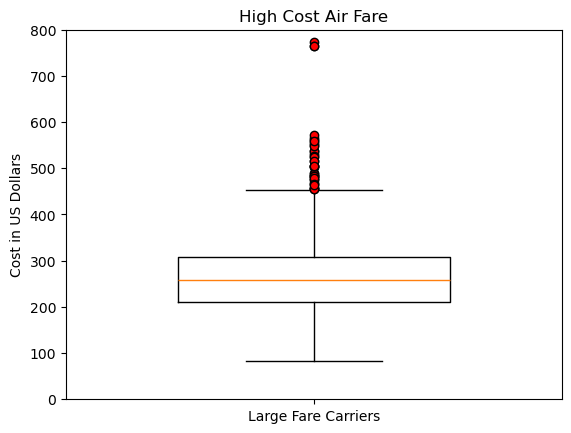

In [11]:
big_air = fare_data_df['fare_lg'].dropna()

quartiles = big_air.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of low air fare is: {lowerq}")
print(f"The upper quartile of low air fare is: {upperq}")
print(f"The interquartile range of low air fare is: {iqr}")
print(f"The the median of low air fare is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


fig2, ax2 = plt.subplots()
ax2.set_title('High Cost Air Fare')
ax2.set_ylabel('Cost in US Dollars')
ax2.boxplot([big_air], vert=True, widths=0.55,
           flierprops=dict(markerfacecolor='r', marker='o'))
ax2.set_xticklabels(['Large Fare Carriers'])
# Set the y-axis range from 0 to 800
ax2.set_ylim(0, 800)

plt.savefig("fig_2_Airfare_Comparison_Boxplot.png")
plt.show()


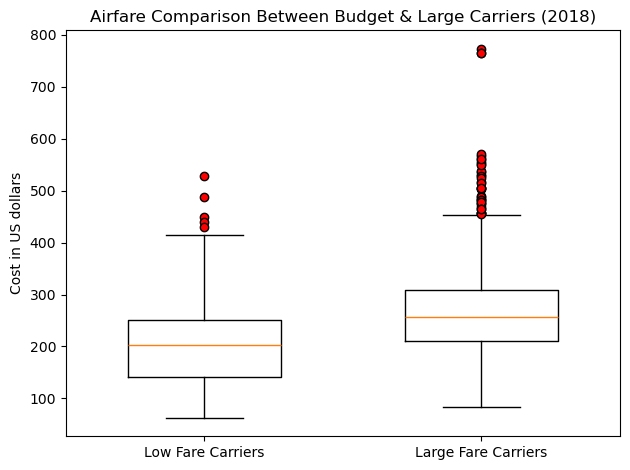

In [12]:
#combining box polts onto same graph


fig3, ax3 = plt.subplots()


ax3.boxplot([budget_air, big_air], vert=True, widths=0.55,
           flierprops=dict(markerfacecolor='r', marker='o'))
           
ax3.set_title('Airfare Comparison Between Budget & Large Carriers (2018)')
ax3.set_ylabel('Cost in US dollars')
ax3.set_xticklabels(['Low Fare Carriers', 'Large Fare Carriers'])
plt.tight_layout()

plt.savefig("fig_3_Airfare_Comparison_Boxplot.png")
plt.show()



In [13]:
fare_data_df.head()

,fare_low,carrier_low,carrier_lg,fare_lg,city1,airport_1,airport_2,city2,airportid_1,airportid_2,large_ms,fare,lf_ms
192616,259.78,WN,UA,348.01,"Albuquerque, NM",ABQ,IAD,"Washington, DC (Metropolitan Area)",10140,12264,0.5205,319.73,0.1406
193319,115.21,F9,UA,259.19,"Albuquerque, NM",ABQ,IAH,"Houston, TX",10140,12266,0.9258,261.24,0.0114
193651,206.38,WN,AA,231.32,"Albuquerque, NM",ABQ,LGA,"New York City, NY (Metropolitan Area)",10140,12953,0.4349,233.80,0.2399
193717,147.35,WN,AA,235.89,"Albuquerque, NM",ABQ,LGB,"Los Angeles, CA (Metropolitan Area)",10140,12954,0.4842,189.29,0.4526
194661,141.14,AS,UA,189.17,"Albuquerque, NM",ABQ,SFO,"San Francisco, CA (Metropolitan Area)",10140,14771,0.5164,175.31,0.2856


In [14]:
# strip out lg cariers from low and recreate box plot
low_carriers_df = fare_data_df['carrier_low'].dropna().unique()
low_carriers_df = fare_data_df[~fare_data_df['carrier_low'].isin(['WN', 'UA', 'DL', 'AA'])]

low_carriers_fare = low_carriers_df['fare_low'].dropna()

The lower quartile of low air fare is: 97.095
The upper quartile of low air fare is: 166.61
The interquartile range of low air fare is: 69.51500000000001
The the median of low air fare is: 114.37 
Values below -7.177500000000023 could be outliers.
Values above 270.88250000000005 could be outliers.


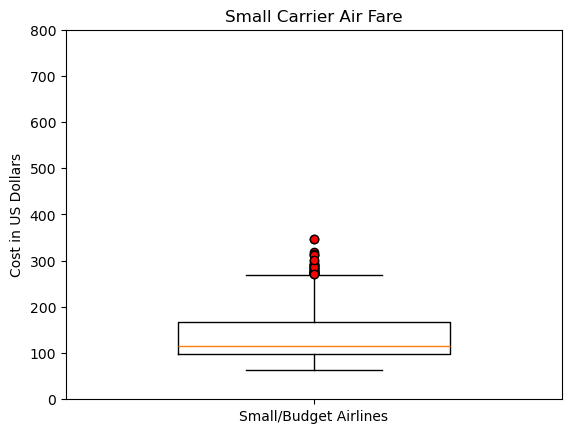

In [15]:
quartiles = low_carriers_fare.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of low air fare is: {lowerq}")
print(f"The upper quartile of low air fare is: {upperq}")
print(f"The interquartile range of low air fare is: {iqr}")
print(f"The the median of low air fare is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




fig4, ax4 = plt.subplots()
ax4.set_title('Small Carrier Air Fare')
ax4.set_ylabel('Cost in US Dollars')
ax4.boxplot([low_carriers_fare], vert=True, widths=0.55,
           flierprops=dict(markerfacecolor='r', marker='o'))
ax4.set_xticklabels(['Small/Budget Airlines'])
# Set the y-axis range from 0 to 800
ax4.set_ylim(0, 800)
plt.savefig("fig_4_Airfare_Comparison_Boxplot.png")
plt.show()
# strip out low from lg and do the same.
# make another combined box plot


In [16]:
# strip out sm cariers from high and recreate box plot
high_carriers_df = fare_data_df['carrier_lg'].dropna().unique()
high_carriers_df = fare_data_df[~fare_data_df['carrier_lg'].isin(['F9', 'AS', 'B6', 'NK', 'G4', 'SY', 'VX'])]

high_carriers_fare = high_carriers_df['fare_lg'].dropna()
high_carriers_fare

192616    348.01
193319    259.19
193651    231.32
193717    235.89
194661    189.17
           ...  
212413    228.78
212417    306.88
212418    371.74
212420    318.76
212422    440.83
Name: fare_lg, Length: 3489, dtype: float64

The lower quartile of low air fare is: 215.48
The upper quartile of low air fare is: 310.81
The interquartile range of low air fare is: 95.33000000000001
The the median of low air fare is: 260.12 
Values below 72.48499999999999 could be outliers.
Values above 453.805 could be outliers.


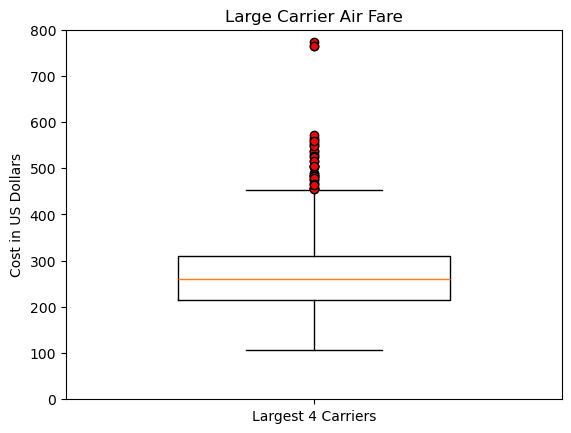

In [17]:
quartiles = high_carriers_fare.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of low air fare is: {lowerq}")
print(f"The upper quartile of low air fare is: {upperq}")
print(f"The interquartile range of low air fare is: {iqr}")
print(f"The the median of low air fare is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




fig5, ax5 = plt.subplots()
ax5.set_title('Large Carrier Air Fare')
ax5.set_ylabel('Cost in US Dollars')
ax5.boxplot([high_carriers_fare], vert=True, widths=0.55,
           flierprops=dict(markerfacecolor='r', marker='o'))
ax5.set_xticklabels(['Largest 4 Carriers'])
# Set the y-axis range from 0 to 800
ax5.set_ylim(0, 800)

plt.savefig("fig_5_Airfare_Comparison_Boxplot.png")
plt.show()

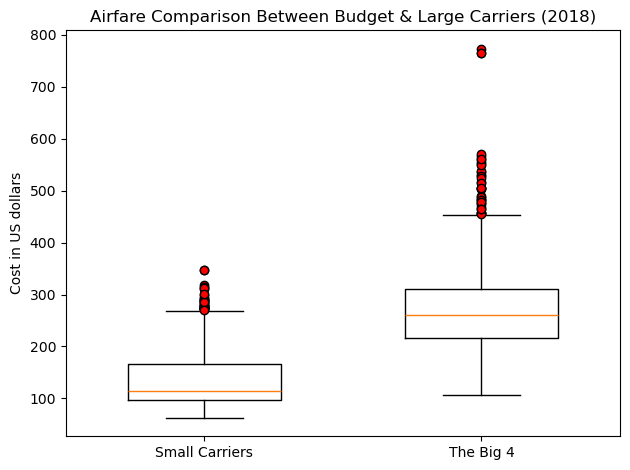

In [18]:
fig6, ax6 = plt.subplots()


ax6.boxplot([low_carriers_fare, high_carriers_fare], vert=True, widths=0.55,
           flierprops=dict(markerfacecolor='r', marker='o'))
           
ax6.set_title('Airfare Comparison Between Budget & Large Carriers (2018)')
ax6.set_ylabel('Cost in US dollars')
ax6.set_xticklabels(['Small Carriers', 'The Big 4'])
plt.tight_layout()

plt.savefig("fig_6_Airfare_Comparison_Boxplot.png")
plt.show()


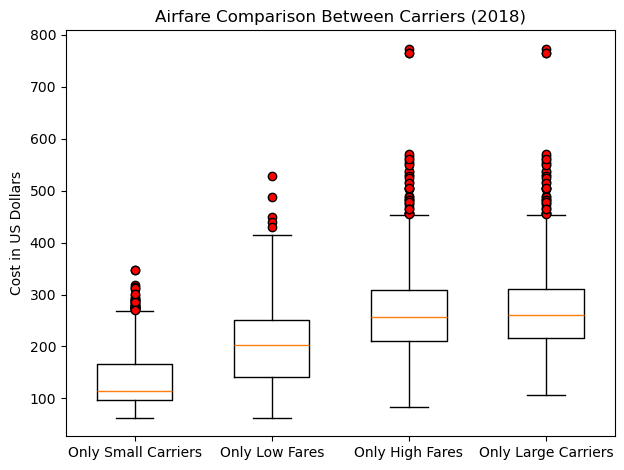

In [19]:
fig7, ax7 = plt.subplots()


ax7.boxplot([low_carriers_fare, budget_air, big_air, high_carriers_fare], vert=True, widths=0.55,
           flierprops=dict(markerfacecolor='r', marker='o'))
           
ax7.set_title('Airfare Comparison Between Carriers (2018)')
ax7.set_ylabel('Cost in US Dollars')
ax7.set_xticklabels(['Only Small Carriers', 'Only Low Fares', 'Only High Fares', 'Only Large Carriers'])
plt.tight_layout()

plt.savefig("fig_7_Airfare_Comparison_Boxplot.png")
plt.show()

In [20]:
# plot budget airline origin and destination cities

In [21]:
low_carriers_df = fare_data_df[~fare_data_df['carrier_low'].isin(['WN', 'UA', 'DL', 'AA'])]
low_carriers_df.dropna().head()

,fare_low,carrier_low,carrier_lg,fare_lg,city1,airport_1,airport_2,city2,airportid_1,airportid_2,large_ms,fare,lf_ms
193319,115.21,F9,UA,259.19,"Albuquerque, NM",ABQ,IAH,"Houston, TX",10140,12266,0.9258,261.24,0.0114
194661,141.14,AS,UA,189.17,"Albuquerque, NM",ABQ,SFO,"San Francisco, CA (Metropolitan Area)",10140,14771,0.5164,175.31,0.2856
196054,109.66,B6,DL,152.09,"Atlanta, GA (Metropolitan Area)",ATL,BOS,"Boston, MA (Metropolitan Area)",10397,10721,0.5796,137.03,0.2695
196056,107.14,NK,WN,155.49,"Atlanta, GA (Metropolitan Area)",ATL,BWI,"Washington, DC (Metropolitan Area)",10397,10821,0.4286,165.31,0.1579
196064,83.02,NK,DL,146.33,"Atlanta, GA (Metropolitan Area)",ATL,FLL,"Miami, FL (Metropolitan Area)",10397,11697,0.5568,132.59,0.1114


In [22]:
#small airline outgoing
small_airlines_df = low_carriers_df[['fare_low', 'carrier_low', #'city1',
                                     'airport_1',
                                     #'airport_2',
                                     'city2'
                                     ]].copy()


small_airlines_df['city2'] = small_airlines_df['city2'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)
small_airlines_df.head()

,fare_low,carrier_low,airport_1,city2
193319,115.21,F9,ABQ,"Houston, TX"
194661,141.14,AS,ABQ,"San Francisco, CA"
196054,109.66,B6,ATL,"Boston, MA"
196056,107.14,NK,ATL,"Washington, DC"
196064,83.02,NK,ATL,"Miami, FL"


In [23]:
# rename carriers 
carrier_mapping = {
    'WN': 'Southwest',
    'F9': 'Frontier',
    'AS': 'Alaska',
    'UA': 'United Airlines',
    'DL': 'Delta',
    'B6': 'Jet Blue',
    'NK': 'Spirit',
    'AA': 'American Airlines',
    'G4': 'Allegiant',
    'SY': 'Sun Country',
    'VX': 'Virgin America'
}
small_airlines_df = small_airlines_df.replace({
    'carrier_low': carrier_mapping})
small_airlines_df.head()

,fare_low,carrier_low,airport_1,city2
193319,115.21,Frontier,ABQ,"Houston, TX"
194661,141.14,Alaska,ABQ,"San Francisco, CA"
196054,109.66,Jet Blue,ATL,"Boston, MA"
196056,107.14,Spirit,ATL,"Washington, DC"
196064,83.02,Spirit,ATL,"Miami, FL"


In [24]:
# read in airports.csv
airport_codes = pd.read_csv('Data/airports.csv')

# rename IATA column
airport_codes.rename(columns={'IATA': 'airport_1'}, inplace=True)

# merge 
outgoing_aiports_df = pd.merge(small_airlines_df, airport_codes, on = "airport_1")
#rename columns
outgoing_aiports_df.rename(columns={'fare_low': 'Price', 'carrier_low': 'Carrier',
                                    'airport_1': 'Airport', 'CITY': 'Out of',  'city2': 'Flying into', 'LATITUDE': 'Lat',
                                    'LONGITUDE': 'Long'}, inplace=True)
#rearrange headers
outgoing_aiports_df = outgoing_aiports_df[['Price', 'Carrier', 'Airport', 'AIRPORT', 'Out of', 'STATE', 'Flying into',
                                           'COUNTRY', 'Lat', 'Long', ]].copy()
                                  

outgoing_aiports_df = outgoing_aiports_df.dropna()

outgoing_aiports_df["Lat"] = outgoing_aiports_df["Lat"].astype(float)
outgoing_aiports_df["Long"] = outgoing_aiports_df["Long"].astype(float)
outgoing_aiports_df.head()

,Price,Carrier,Airport,AIRPORT,Out of,STATE,Flying into,COUNTRY,Lat,Long
0,115.21,Frontier,ABQ,Albuquerque International,Albuquerque,NM,"Houston, TX",USA,35.040222,-106.609194
1,141.14,Alaska,ABQ,Albuquerque International,Albuquerque,NM,"San Francisco, CA",USA,35.040222,-106.609194
2,109.66,Jet Blue,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,"Boston, MA",USA,33.640444,-84.426944
3,107.14,Spirit,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,"Washington, DC",USA,33.640444,-84.426944
4,83.02,Spirit,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,"Miami, FL",USA,33.640444,-84.426944


In [25]:
# Configure the map
outgoing_map = outgoing_aiports_df.hvplot.points(
    "Long",
    "Lat",
    geo = True,
    tiles = "EsriWorldStreetMap",
    frame_width = 800,
    frame_height = 600,
    size = "Price",
    scale = 1,
    color = "Carrier",
    hover_cols = ['Out of', 'Airport', 'Flying into'],
    title="Outgoing Flights by Small Airlines in 2018"
)

# Display the map plot
outgoing_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Carrier,Price,Out of,Airport,Flying into)

In [26]:
#small airline destination
small_airlines_dest = low_carriers_df[['fare_low', 'carrier_low', #'city1',
                                     #'airport_1',
                                     'airport_2',
                                     'city2'
                                     ]].copy()
small_airlines_dest['city2'] = small_airlines_df['city2'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)
small_airlines_dest.head()

,fare_low,carrier_low,airport_2,city2
193319,115.21,F9,IAH,"Houston, TX"
194661,141.14,AS,SFO,"San Francisco, CA"
196054,109.66,B6,BOS,"Boston, MA"
196056,107.14,NK,BWI,"Washington, DC"
196064,83.02,NK,FLL,"Miami, FL"


In [27]:
# rename carriers 
carrier_mapping = {
    'WN': 'Southwest',
    'F9': 'Frontier',
    'AS': 'Alaska',
    'UA': 'United Airlines',
    'DL': 'Delta',
    'B6': 'Jet Blue',
    'NK': 'Spirit',
    'AA': 'American Airlines',
    'G4': 'Allegiant',
    'SY': 'Sun Country',
    'VX': 'Virgin America'
}
small_airlines_dest = small_airlines_dest.replace({
    'carrier_low': carrier_mapping})
small_airlines_dest.head()

,fare_low,carrier_low,airport_2,city2
193319,115.21,Frontier,IAH,"Houston, TX"
194661,141.14,Alaska,SFO,"San Francisco, CA"
196054,109.66,Jet Blue,BOS,"Boston, MA"
196056,107.14,Spirit,BWI,"Washington, DC"
196064,83.02,Spirit,FLL,"Miami, FL"


In [28]:
# read in airports.csv
airport_codes = pd.read_csv('Data/airports.csv')

# rename IATA column
airport_codes.rename(columns={'IATA': 'airport_2'}, inplace=True)

# merge 
dest_airports_df = pd.merge(small_airlines_dest, airport_codes, on = "airport_2")
dest_airports_df.head()

,fare_low,carrier_low,airport_2,city2,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,115.21,Frontier,IAH,"Houston, TX",George Bush Intercontinental,Houston,TX,USA,29.980472,-95.339722
1,141.14,Alaska,SFO,"San Francisco, CA",San Francisco International,San Francisco,CA,USA,37.619002,-122.374843
2,109.66,Jet Blue,BOS,"Boston, MA",Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179
3,107.14,Spirit,BWI,"Washington, DC",Baltimore-Washington International,Baltimore,MD,USA,39.175402,-76.668198
4,83.02,Spirit,FLL,"Miami, FL",Fort Lauderdale-Hollywood Int'l,Ft. Lauderdale,FL,USA,26.072583,-80.152750


In [29]:
#rename columns
dest_airports_df.rename(columns={'fare_low': 'Price', 'carrier_low': 'Carrier',
                                    'airport_2': 'Airport', 'city2': 'Landing in', 'AIRPORT': 'at',
                                    'LATITUDE': 'Lat', 'LONGITUDE': 'Long'}, inplace=True)
dest_airports_df.head()

,Price,Carrier,Airport,Landing in,at,CITY,STATE,COUNTRY,Lat,Long
0,115.21,Frontier,IAH,"Houston, TX",George Bush Intercontinental,Houston,TX,USA,29.980472,-95.339722
1,141.14,Alaska,SFO,"San Francisco, CA",San Francisco International,San Francisco,CA,USA,37.619002,-122.374843
2,109.66,Jet Blue,BOS,"Boston, MA",Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179
3,107.14,Spirit,BWI,"Washington, DC",Baltimore-Washington International,Baltimore,MD,USA,39.175402,-76.668198
4,83.02,Spirit,FLL,"Miami, FL",Fort Lauderdale-Hollywood Int'l,Ft. Lauderdale,FL,USA,26.072583,-80.152750


In [30]:
#drop empty, and fix numbers
dest_airports_df = dest_airports_df.dropna()

dest_airports_df["Lat"] = dest_airports_df["Lat"].astype(float)
dest_airports_df["Long"] = dest_airports_df["Long"].astype(float)
dest_airports_df

#how many airports have small carriers? (69)
unique_airport_counts = dest_airports_df['Airport'].value_counts()
unique_airport_counts

Airport
TPA    85
SFO    82
BWI    66
FLL    62
IAD    58
       ..
CVG     1
PSP     1
MKE     1
MYR     1
BDL     1
Name: count, Length: 69, dtype: int64

In [31]:
# Configure the map
destination_map = dest_airports_df.hvplot.points(
    "Long",
    "Lat",
    geo = True,
    tiles = "EsriWorldStreetMap",
    frame_width = 800,
    frame_height = 600,
    size = "Price",
    scale = 1,
    color = "Carrier",
    hover_cols = ['Landing in', 'at'],
    title="Destinations of Small Airlines in 2018"
)
# save a copy

# Display the map plot
destination_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Carrier,Price,Landing in,at)

In [32]:
# map of big 4

In [33]:
fare_data_df.head()

,fare_low,carrier_low,carrier_lg,fare_lg,city1,airport_1,airport_2,city2,airportid_1,airportid_2,large_ms,fare,lf_ms
192616,259.78,WN,UA,348.01,"Albuquerque, NM",ABQ,IAD,"Washington, DC (Metropolitan Area)",10140,12264,0.5205,319.73,0.1406
193319,115.21,F9,UA,259.19,"Albuquerque, NM",ABQ,IAH,"Houston, TX",10140,12266,0.9258,261.24,0.0114
193651,206.38,WN,AA,231.32,"Albuquerque, NM",ABQ,LGA,"New York City, NY (Metropolitan Area)",10140,12953,0.4349,233.80,0.2399
193717,147.35,WN,AA,235.89,"Albuquerque, NM",ABQ,LGB,"Los Angeles, CA (Metropolitan Area)",10140,12954,0.4842,189.29,0.4526
194661,141.14,AS,UA,189.17,"Albuquerque, NM",ABQ,SFO,"San Francisco, CA (Metropolitan Area)",10140,14771,0.5164,175.31,0.2856
